In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [118]:
df = pd.read_csv("/content/first inten project - first inten project.csv")
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [119]:
df.shape

(36285, 17)

In [120]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [122]:
df.nunique()

,0
Booking_ID,36285
number of adults,5
number of children,6
number of weekend nights,8
number of week nights,18
type of meal,4
car parking space,2
room type,7
lead time,352
market segment type,5


# Booking status distribution
This gives us a quick overview of the percentage of cancellations versus successful bookings, helping to analyze customer behavior.

In [123]:
df['booking status'] = df['booking status'].replace('Not_Canceled', 'Not Canceled')

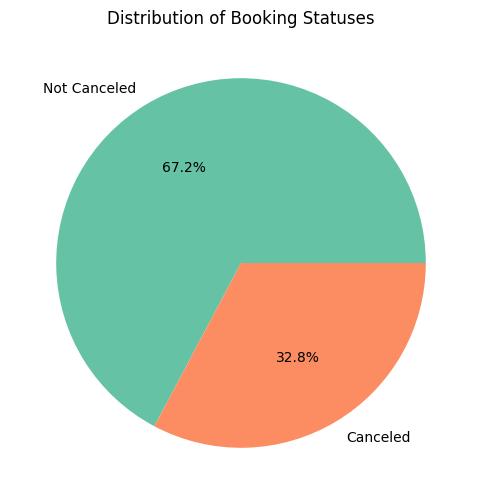

In [124]:
status_counts = df['booking status'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('Set2').colors)
plt.title('Distribution of Booking Statuses')
plt.show()

# Visualize the number of adults, number of children, and total guests using bar plots

<ipython-input-125-dbfa82f96e35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['number of adults'].value_counts().index,


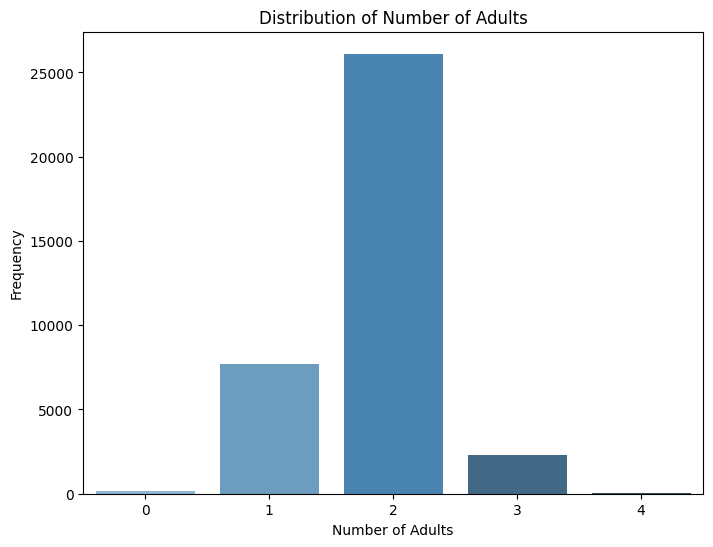

<ipython-input-125-dbfa82f96e35>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['number of children'].value_counts().index,


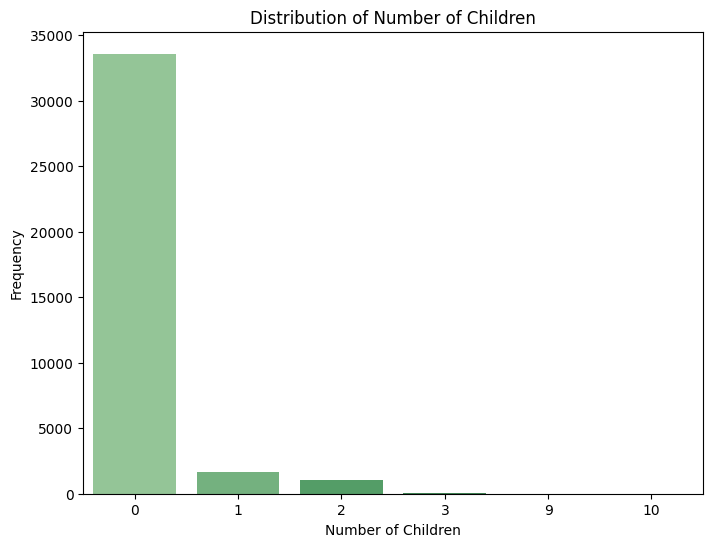

<ipython-input-125-dbfa82f96e35>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['total_guests'].value_counts().index,


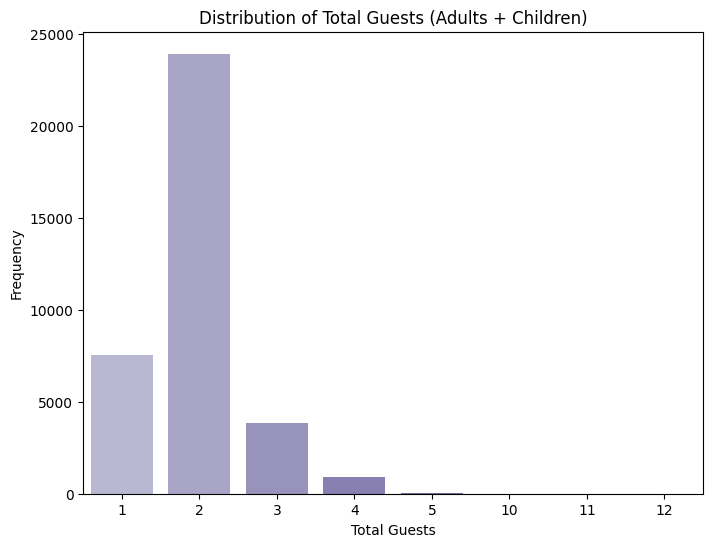

In [125]:
# Calculate the total number of guests
df['total_guests'] = df['number of adults'] + df['number of children']

# 1. Bar plot for number of adults
plt.figure(figsize=(8, 6))
sns.barplot(x=df['number of adults'].value_counts().index,
            y=df['number of adults'].value_counts().values,
            palette='Blues_d')
plt.title('Distribution of Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()

# 2. Bar plot for number of children
plt.figure(figsize=(8, 6))
sns.barplot(x=df['number of children'].value_counts().index,
            y=df['number of children'].value_counts().values,
            palette='Greens_d')
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

# 3. Bar plot for total guests
plt.figure(figsize=(8, 6))
sns.barplot(x=df['total_guests'].value_counts().index,
            y=df['total_guests'].value_counts().values,
            palette='Purples_d')
plt.title('Distribution of Total Guests (Adults + Children)')
plt.xlabel('Total Guests')
plt.ylabel('Frequency')
plt.show()

# Trying to find the booking patterns


In [126]:
df['total_nights'] = df['number of weekend nights'] + df['number of week nights']
# Calculate total nights for each booking

In [127]:
weekend_week_nights = df[['number of weekend nights', 'number of week nights']].sum()
# 1. Distribution of weekend nights vs. week nights
# Create a DataFrame for analysis

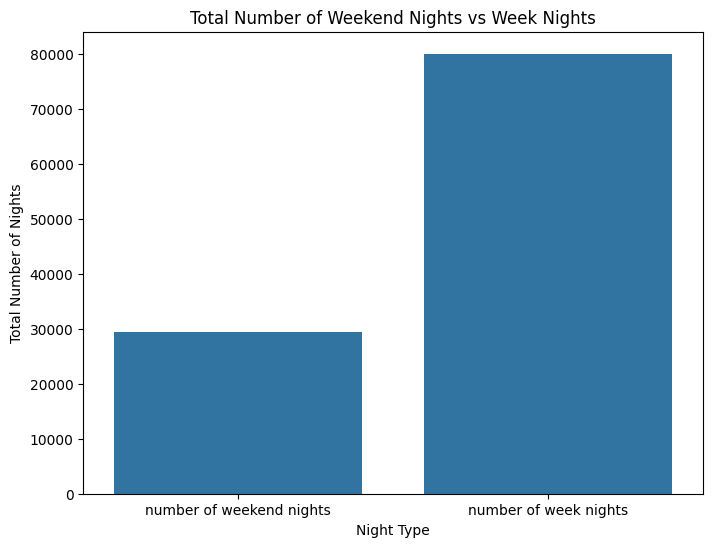

In [128]:
plt.figure(figsize=(8, 6))
sns.barplot(x=weekend_week_nights.index, y=weekend_week_nights.values)
plt.title('Total Number of Weekend Nights vs Week Nights')
plt.ylabel('Total Number of Nights')
plt.xlabel('Night Type')
plt.show()
#Visualize the patterns
# Create a bar plot comparing weekend and week nights

In [129]:
booking_pattern = df.groupby('booking status')[['number of weekend nights', 'number of week nights']].mean()
#Analyze based on booking status
#group the data based on booking status

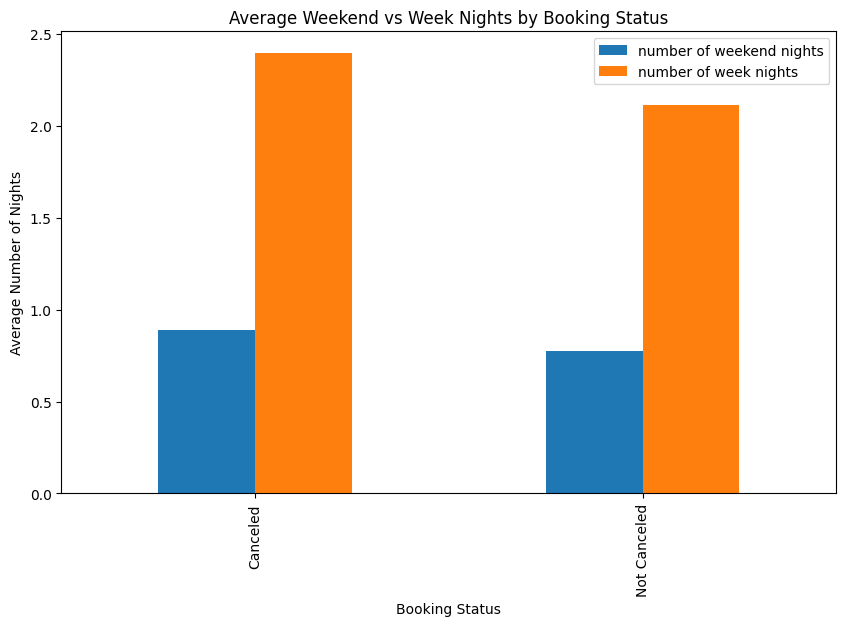

In [130]:
booking_pattern.plot(kind='bar', figsize=(10, 6))
plt.title('Average Weekend vs Week Nights by Booking Status')
plt.ylabel('Average Number of Nights')
plt.xlabel('Booking Status')
plt.show()

# Trying to find are there patterns in market segments or room types?

In [131]:
#Group by market segment and count the occurrences
market_segment_counts = df['market segment type'].value_counts()

<ipython-input-132-726baefb2c83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')


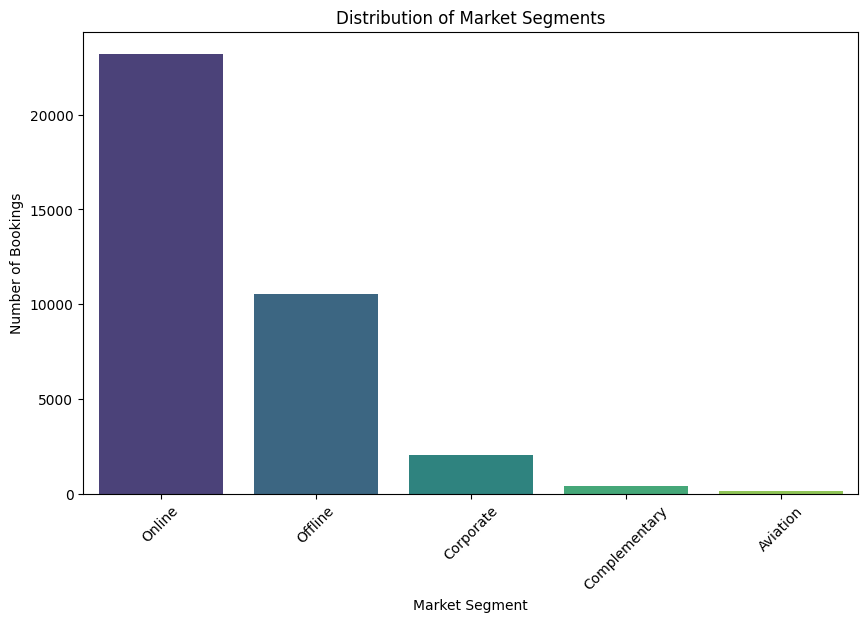

In [132]:
# Visualize the distribution of market segments
plt.figure(figsize=(10, 6))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette='viridis')
plt.title('Distribution of Market Segments')
plt.xlabel('Market Segment')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

<ipython-input-133-73bc9dfc9b70>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')


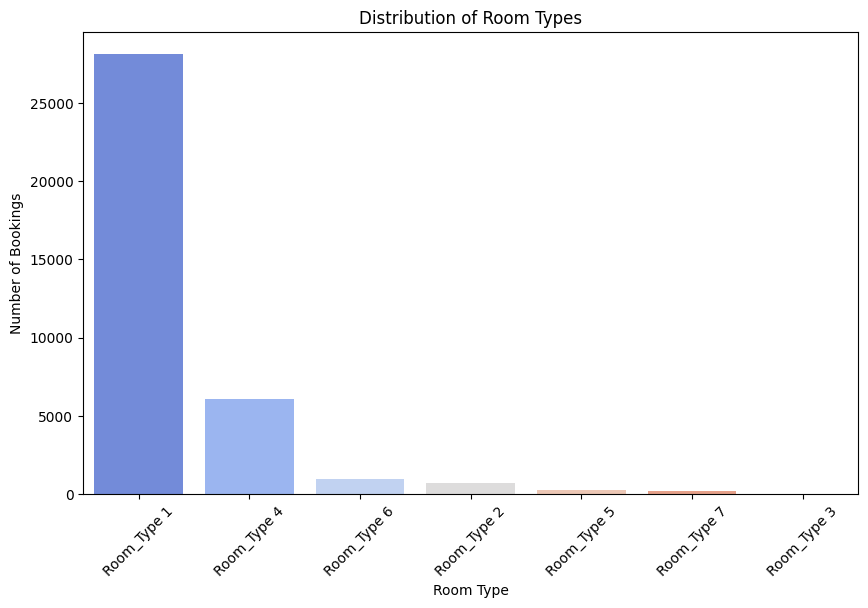

In [133]:
# Group by room type and count the occurrences
room_type_counts = df['room type'].value_counts()

# Visualize the distribution of room types
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='coolwarm')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

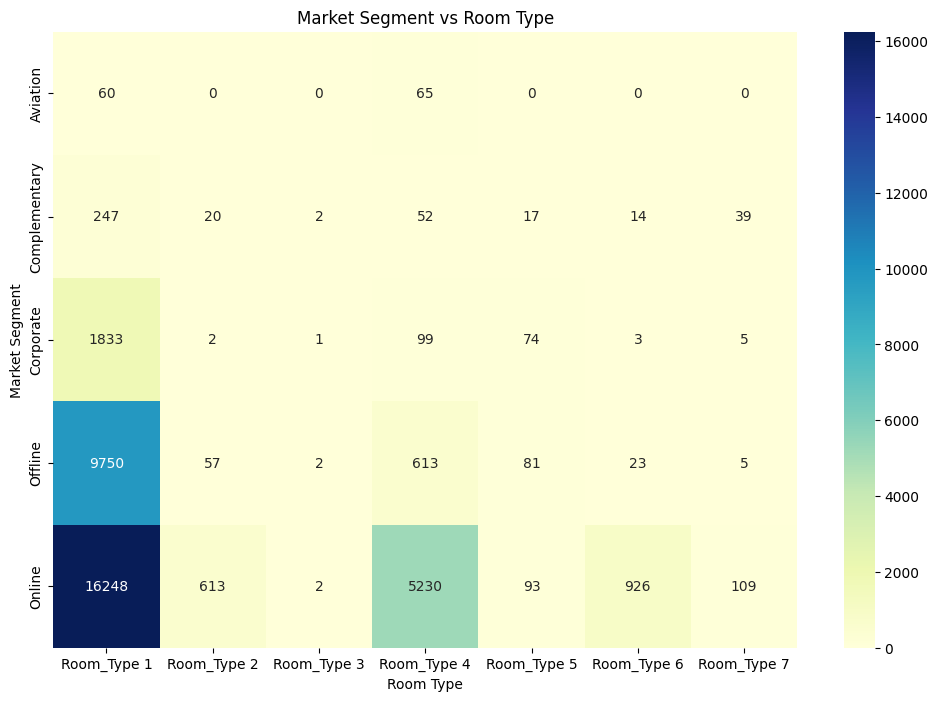

In [134]:
# Analyze patterns between market segments and room types
# Create a crosstab to see the relationship between market segments and room types
market_room_crosstab = pd.crosstab(df['market segment type'], df['room type'])

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(market_room_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Market Segment vs Room Type')
plt.ylabel('Market Segment')
plt.xlabel('Room Type')
plt.show()

# Do special requests or lead time affect booking status?


<ipython-input-135-842297d83af0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='booking status', y='special requests', data=df, palette='coolwarm')


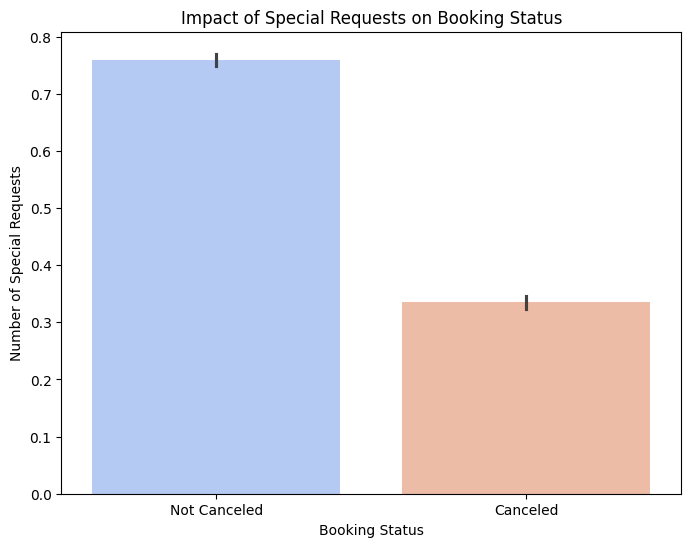

In [135]:
#Analyze Special Requests vs Booking Status
plt.figure(figsize=(8, 6))
sns.barplot(x='booking status', y='special requests', data=df, palette='coolwarm')
plt.title('Impact of Special Requests on Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Number of Special Requests')
plt.show()


<ipython-input-136-97e388f284d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking status', y='lead time', data=df, palette='coolwarm')


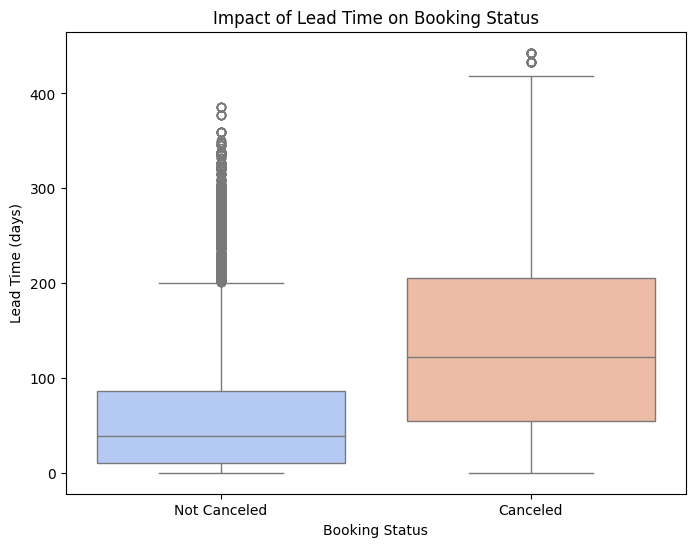

In [136]:
#Analyze Lead Time vs Booking Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='booking status', y='lead time', data=df, palette='coolwarm')
plt.title('Impact of Lead Time on Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')
plt.show()

In [137]:
# Correlation Analysis (for lead time and special requests)
correlation_lead_time = df[['lead time', 'special requests']].corr()
print("Correlation between Lead Time and Special Requests:\n", correlation_lead_time)


Correlation between Lead Time and Special Requests:
                   lead time  special requests
lead time          1.000000         -0.101604
special requests  -0.101604          1.000000
